## **Code Gladiators 2021 - Machine Learning Contest: Conversion fraud in Digital Advertising**

> #### Group-Name: Infyzero
> #### Team-Members: Rutuja Vaidya & Siddharth Kulkarni

### Problem Statement: 
##### Segregate the test data between genuine and false conversions by identifying the maximum possible leads generated by the malignant technique.

![](https://mk0bfsieletsonlt96u6.kinstacdn.com/wp-content/uploads/2017/07/Fraud.jpg)

## **1. Loading The Datasets**

In [1]:
library(readr)
library(dplyr)
options(warn=-1)

train = read_csv("../input/cg2021/Training Data.csv")
test = read_csv("../input/cg2021/Test Data.csv")
log = read_csv("../input/cg2021/click_log.csv")
sub = read_csv("../input/cg2021/sample_submission.csv")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  clmbuserid_cr = col_character(),
  imprid_cr = col_character(),
  audiences_cr = col_character(),
  ip_cr = col_character(),
  refurl_cr = col_character(),
  allAudiences_cr = col_character(),
  connTypeDimId_cr = col_number(),
  uvh_cr = col_logical(),
  sdkVersion_cr = col_character(),
  usrClusterId_cr = col_number(),
  siteClusterIds_cr = col_number(),
  conversionid_cr = col_character(),
  optimize_on_cr = col_logical(),
  conversion_fraud = col_logical()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  clmbuserid_cr = col_character(),
  imprid_cr 

#### 1.1 Glimpse for Train Data

In [2]:
glimpse(train)

Rows: 965
Columns: 56
$ clientid_cr                   <dbl> 75694, 75694, 75694, 75694, 30431, 75694…
$ clmbuserid_cr                 <chr> "31629cd0-0b34-460f-aa61-80c3234e1225-1s…
$ conversiontime_cr             <dbl> 1.62e+12, 1.62e+12, 1.62e+12, 1.62e+12, …
$ imprid_cr                     <chr> "01649076-c77f-4d70-afc8-213535427147-1s…
$ adslotdimid_cr                <dbl> 321300, 129239, 321554, 321300, 355768, …
$ algo_cr                       <dbl> 38, 38, 21, 38, 21, 38, 38, 39, 21, 18, …
$ audiences_cr                  <chr> "8gw,o3b", "8kv,2vk,8gw,2vl", "8gw,o3b",…
$ clickbid_cr                   <dbl> 2.869316, 2.790000, 2.790000, 2.790000, …
$ geodimid_cr                   <dbl> 144, 144, 144, 144, 144, 144, 144, 144, …
$ ip_cr                         <chr> "XXX.XXX.XXX.XXX", "XXX.XXX.XXX.XXX", "X…
$ itemcolumbiaid_cr             <dbl> 5488088, 5488773, 5488088, 5488088, 5614…
$ itemid_cr                     <dbl> 49504155, 49504157, 49504160, 49504155, …
$ position_cr     

#### 1.2 Glimpse for Test Data

In [3]:
glimpse(test)

Rows: 455
Columns: 56
$ record_id                     <dbl> 1000, 1001, 1002, 1003, 1004, 1005, 1006…
$ clientid_cr                   <dbl> 82122, 75694, 75694, 30431, 30431, 30431…
$ clmbuserid_cr                 <chr> "1045e8b8-662e-49b3-bc4a-4af5326c8236-62…
$ conversiontime_cr             <dbl> 1.62e+12, 1.62e+12, 1.62e+12, 1.62e+12, …
$ imprid_cr                     <chr> "864cdaf0-cca7-4bcc-b210-a33858cf8755-1s…
$ adslotdimid_cr                <dbl> 233531, 356952, 356952, 355768, 355768, …
$ algo_cr                       <dbl> 38, 20, 18, 21, 21, 21, 26, 20, 18, 38, …
$ audiences_cr                  <chr> NA, NA, NA, NA, NA, NA, "8kv,2vk,8gw,2vl…
$ clickbid_cr                   <dbl> NA, 3.10000, 3.10000, NA, NA, NA, 3.1000…
$ geodimid_cr                   <dbl> 145, 144, 144, 144, 144, 144, 144, 144, …
$ ip_cr                         <chr> "XXX.XXX.XXX.XXX", "XXX.XXX.XXX.XXX", "X…
$ itemcolumbiaid_cr             <dbl> 5526656, 5488773, 5488088, 5614054, 5614…
$ itemid_cr       

#### 1.3 Glimpse for Click Log File
> *Has Additional Features*

In [4]:
glimpse(log)

Rows: 244,864
Columns: 55
$ X1                        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ imprId                    <chr> "72efd138-0f6a-4aed-bd3f-9bdd70c0e869-1sjts"…
$ clmbUserId                <chr> "e91fcf75-a645-40f6-ab1f-411017d1d19a-631k",…
$ adSltDimId                <dbl> 207251, 356952, 350086, 356952, 129239, 3569…
$ auds                      <chr> "2vv,8k8,8gv,2vk,8gw,joa", "8gw,2vb,o3b", "2…
$ allAuds                   <chr> "7dm,cy9,5b2,oy7,p98,lo4,p12,p16,apc,p18,nqy…
$ itemid                    <dbl> 52696204, 53622457, 53622457, 53622457, 5362…
$ algo                      <dbl> 18, 18, 38, 38, 38, 38, 38, 18, 18, 18, 18, …
$ advClientId               <dbl> 330, 330, 330, 330, 330, 330, 330, 330, 330,…
$ pubClientId               <dbl> 2310, 85030, 2658, 85030, 15240, 85030, 1524…
$ itmClmbLId                <dbl> 5618155, 5617956, 5617956, 5617956, 5617956,…
$ tmpltId                   <dbl> 5627, 5167, 5657, 5167, 663, 5167, 663, 5627…
$ refUrl      

## **2. Joining Train with Click-log & Test with Click-log**

> #### As mentioned in the problem statement we Join the Datasets.

![](http://cdn.mindmajix.com/blog/images/db-01_2119.png)

> #### We Perform Left Join because we dont want to change number of records from Train & Test Dataset.

> #### After Joining we select features mentioned in the PS.

In [5]:
# Renaming 2nd column from log file because left join needs same column name by which we are joining 2 datasets.
# We remove duplicates from log file & then perform join.

names(log)[2] = "imprid_cr"
log = log[!(duplicated(log$imprid_cr)),]

train1 = left_join(train,log,by = "imprid_cr")
test1 = left_join(test,log,by = "imprid_cr")

# Selecting Essential attributes

train = select(train1,clientid_cr,pubclientid_cr,clickIp,clmbuserid_cr,imprid_cr,siteId_cr,
               goalid_cr,cityId_cr,stateId_cr,countryDimId_cr,browserId_cr,adslotdimid_cr,
               crtd,itmClmbLId,ispDimId_cr,devTypeDimId,osVerDimId_cr,conversion_fraud)
test = select(test1,clientid_cr,pubclientid_cr,clickIp,clmbuserid_cr,imprid_cr,siteId_cr,
              goalid_cr,cityId_cr,stateId_cr,countryDimId_cr,browserId_cr,adslotdimid_cr,
              crtd,itmClmbLId,ispDimId_cr,devTypeDimId,osVerDimId_cr)

#### 2.1 Glimpse of Train Dataset after Join & FS

In [6]:
glimpse(train)

Rows: 965
Columns: 18
$ clientid_cr      <dbl> 75694, 75694, 75694, 75694, 30431, 75694, 75694, 7569…
$ pubclientid_cr   <dbl> 2320, 15240, 2320, 2320, 1, 15240, 2320, 2308, 2658, …
$ clickIp          <chr> "0", "0", "0", "0", NA, "0", "0", "0", "52.91.195.65"…
$ clmbuserid_cr    <chr> "31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw", "4c98f1…
$ imprid_cr        <chr> "01649076-c77f-4d70-afc8-213535427147-1sjd4", "f84d83…
$ siteId_cr        <dbl> 34, 178, 34, 34, 3296, 178, 34, 4, 3, 3290, 3296, 3, …
$ goalid_cr        <dbl> 6384, 6384, 6384, 6384, 3370, 6384, 6384, 6384, 8628,…
$ cityId_cr        <dbl> 436, 10314, 0, 10300, 0, 10314, 439, 0, 0, 439, 34703…
$ stateId_cr       <dbl> 1806, 1817, 1812, 1815, 1818, 1817, 1815, 2571, 2442,…
$ countryDimId_cr  <dbl> 144, 144, 144, 144, 144, 144, 144, 144, 145, 144, 144…
$ browserId_cr     <dbl> 129639, 129639, 129639, 129639, 129408, 129639, 12963…
$ adslotdimid_cr   <dbl> 321300, 129239, 321554, 321300, 355768, 129239, 32130…
$ crtd            

#### 2.2 Glimpse of Test Dataset after Join & FS

In [7]:
glimpse(test)

Rows: 455
Columns: 17
$ clientid_cr     <dbl> 82122, 75694, 75694, 30431, 30431, 30431, 75694, 75694…
$ pubclientid_cr  <dbl> 2658, 85030, 85030, 1, 1, 1, 15240, 15240, 16153, 2658…
$ clickIp         <chr> "0", "0", "0", NA, NA, NA, "0", "0", "0", "0", "0", "0…
$ clmbuserid_cr   <chr> "1045e8b8-662e-49b3-bc4a-4af5326c8236-62kw", "53a9a707…
$ imprid_cr       <chr> "864cdaf0-cca7-4bcc-b210-a33858cf8755-1siz8", "6c44c17…
$ siteId_cr       <dbl> 3, 3290, 3290, 3296, 3296, 3296, 178, 178, 1057, 3, 12…
$ goalid_cr       <dbl> 8628, 6384, 6384, 3370, 3370, 3370, 6384, 6384, 6719, …
$ cityId_cr       <dbl> 0, 10278, 10278, 10239, 10239, 10239, 10240, 10286, 43…
$ stateId_cr      <dbl> 2442, 1808, 1808, 1801, 1801, 1801, 1802, 1810, 1808, …
$ countryDimId_cr <dbl> 145, 144, 144, 144, 144, 144, 144, 144, 144, 145, 144,…
$ browserId_cr    <dbl> 0, 129639, 129639, 129408, 129408, 129408, 129639, 0, …
$ adslotdimid_cr  <dbl> 233531, 356952, 356952, 355768, 355768, 355768, 129239…
$ crtd            

In [8]:
# Dropping crtd from train & test because it has only 1 unique value
train = select(train,-crtd)
test = select(test,-crtd)

##  **3. Exploratory Data Analysis**

In [9]:
# Dummy Train & Test for EDA
train1 = train
test1 = test

# Converting all character columns to factors
train1[sapply(train1, is.character)] = lapply(train1[sapply(train1,is.character)],as.factor)
test1[sapply(test1, is.character)] = lapply(test1[sapply(test1,is.character)],as.factor)

#### *To Maintain The Size of Graph*

In [10]:
library(repr) 
options(repr.plot.width=16, repr.plot.height=10)

#### 3.1 Missing Pattern in Train Data

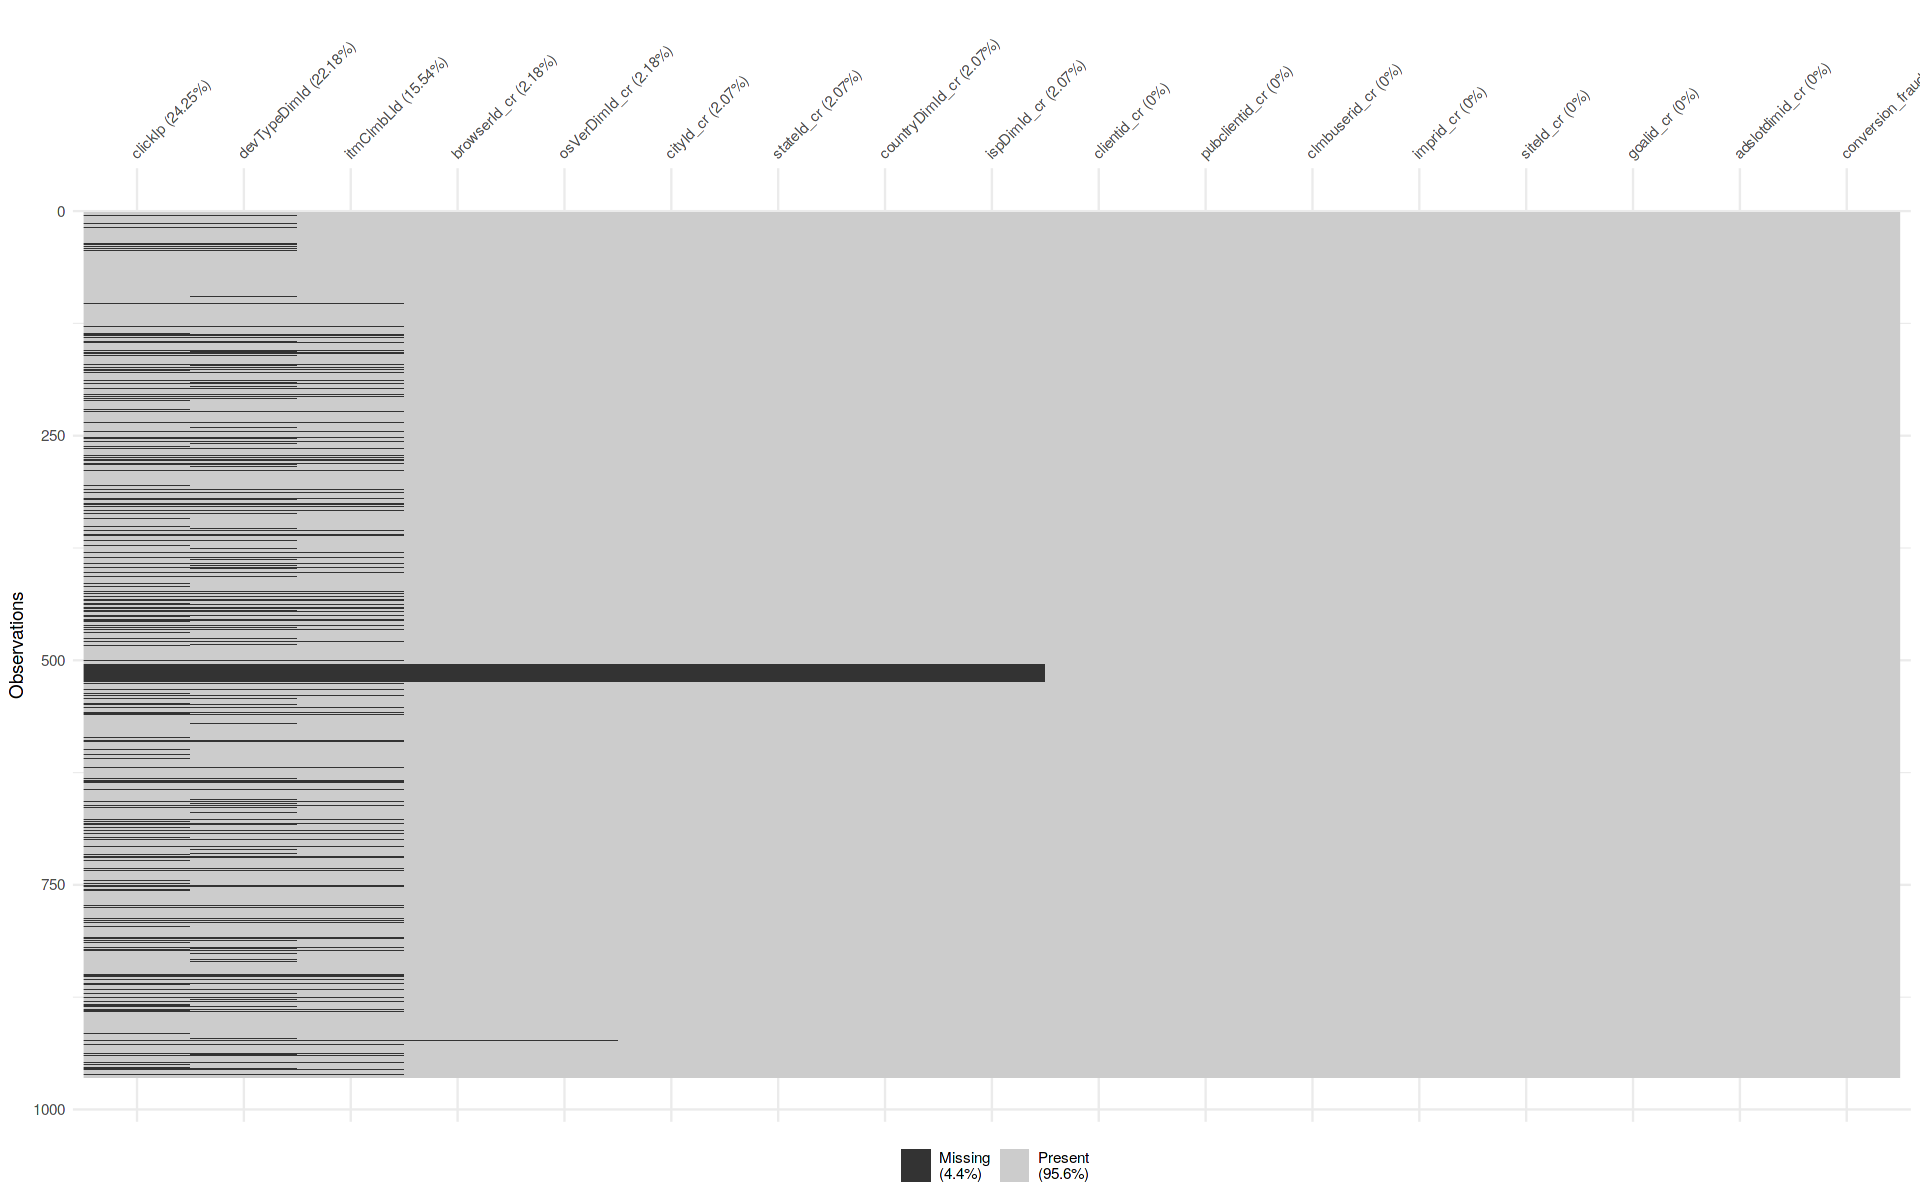

In [11]:
library(naniar)
vis_miss(train1,sort_miss = T,show_perc = TRUE,show_perc_col = TRUE)

#### 3.2 Missing Pattern in Test Data

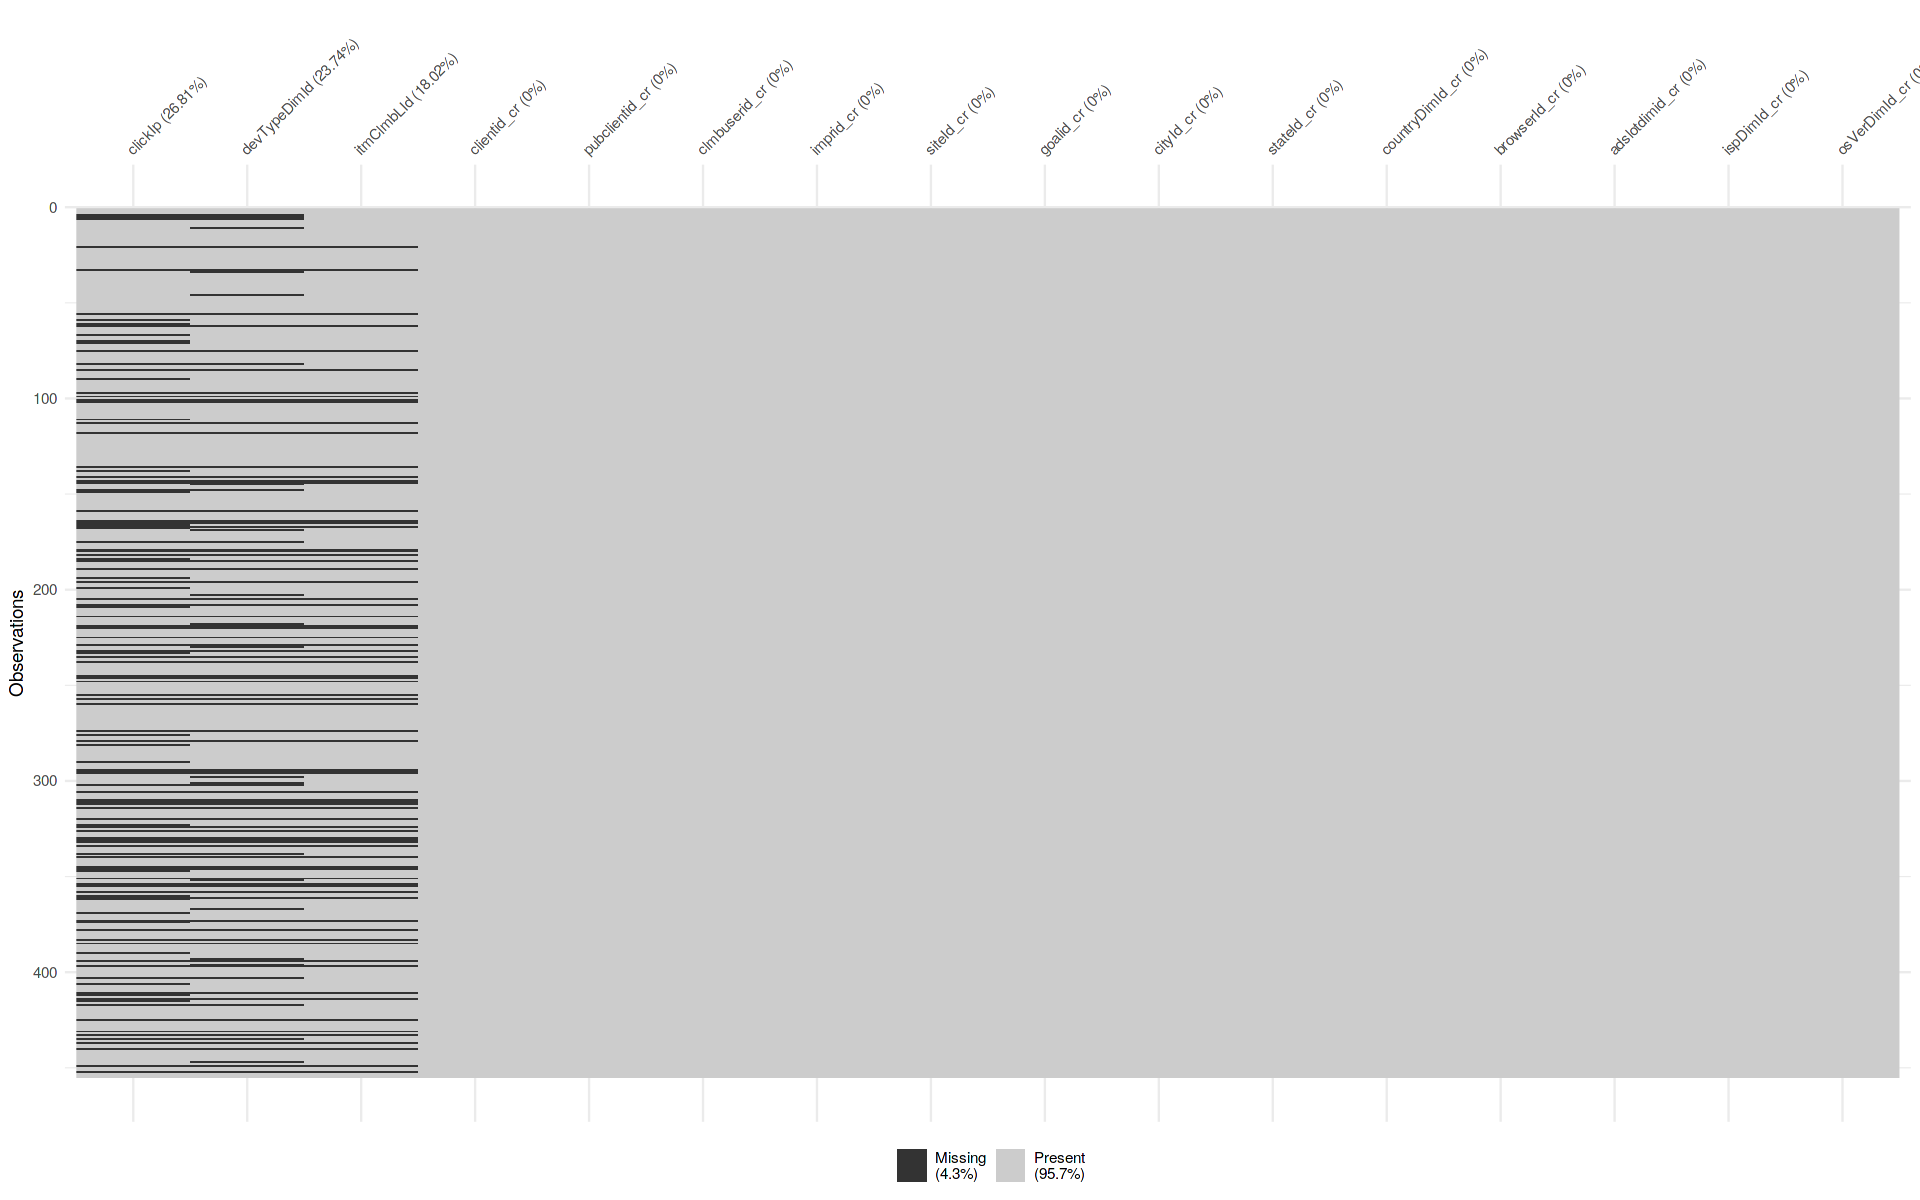

In [12]:
vis_miss(test1,sort_miss = T,show_perc = TRUE,show_perc_col = TRUE)

#### 3.3 Analyzing all the Numeric Variables in Train Data

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


funModeling v.1.9.3 :)
Examples and tutorials at livebook.datascienceheroes.com
 / Now in Spanish: librovivodecienciadedatos.ai



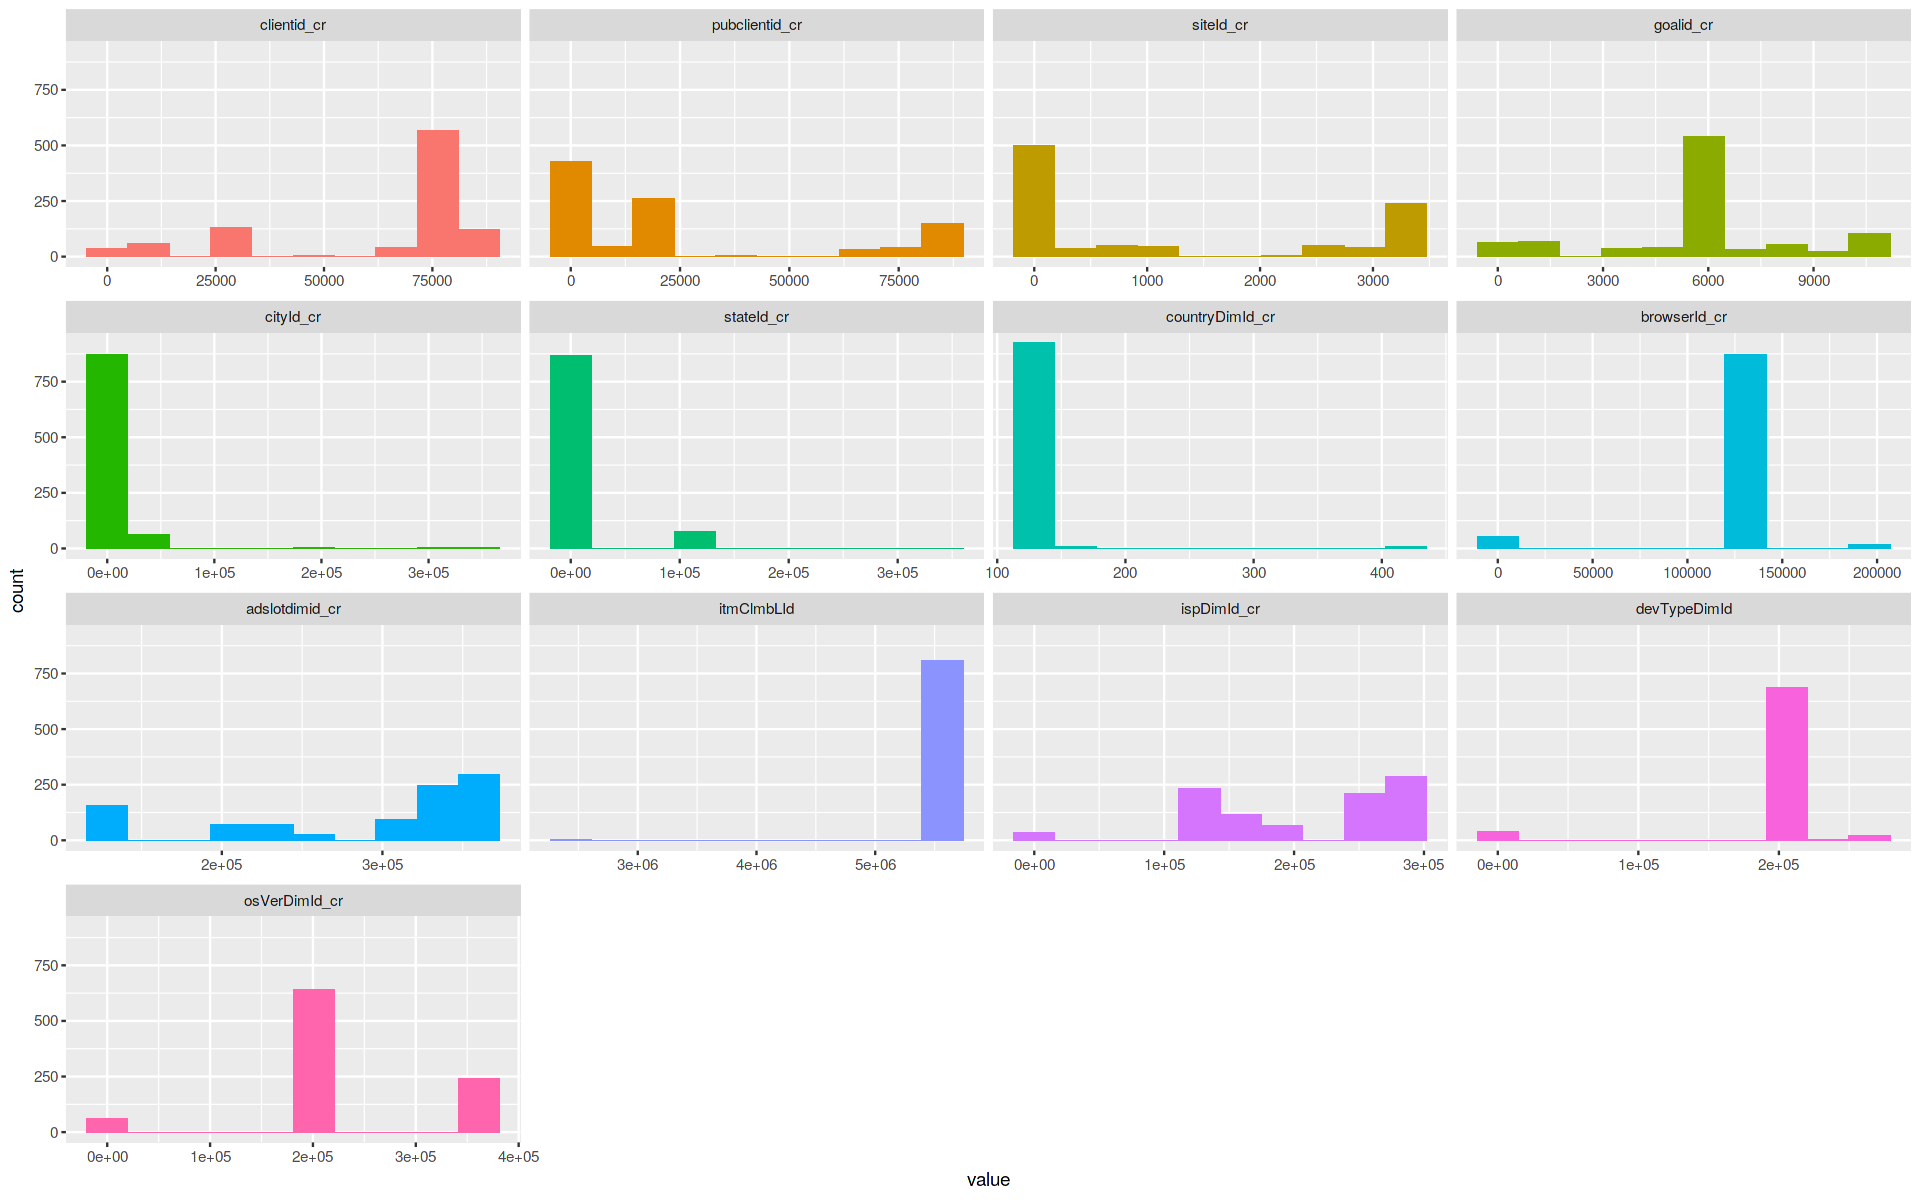

In [13]:
library(funModeling) 

plot_num(train1)

#### 3.4 Analyzing all the Numeric Variables in Test Data

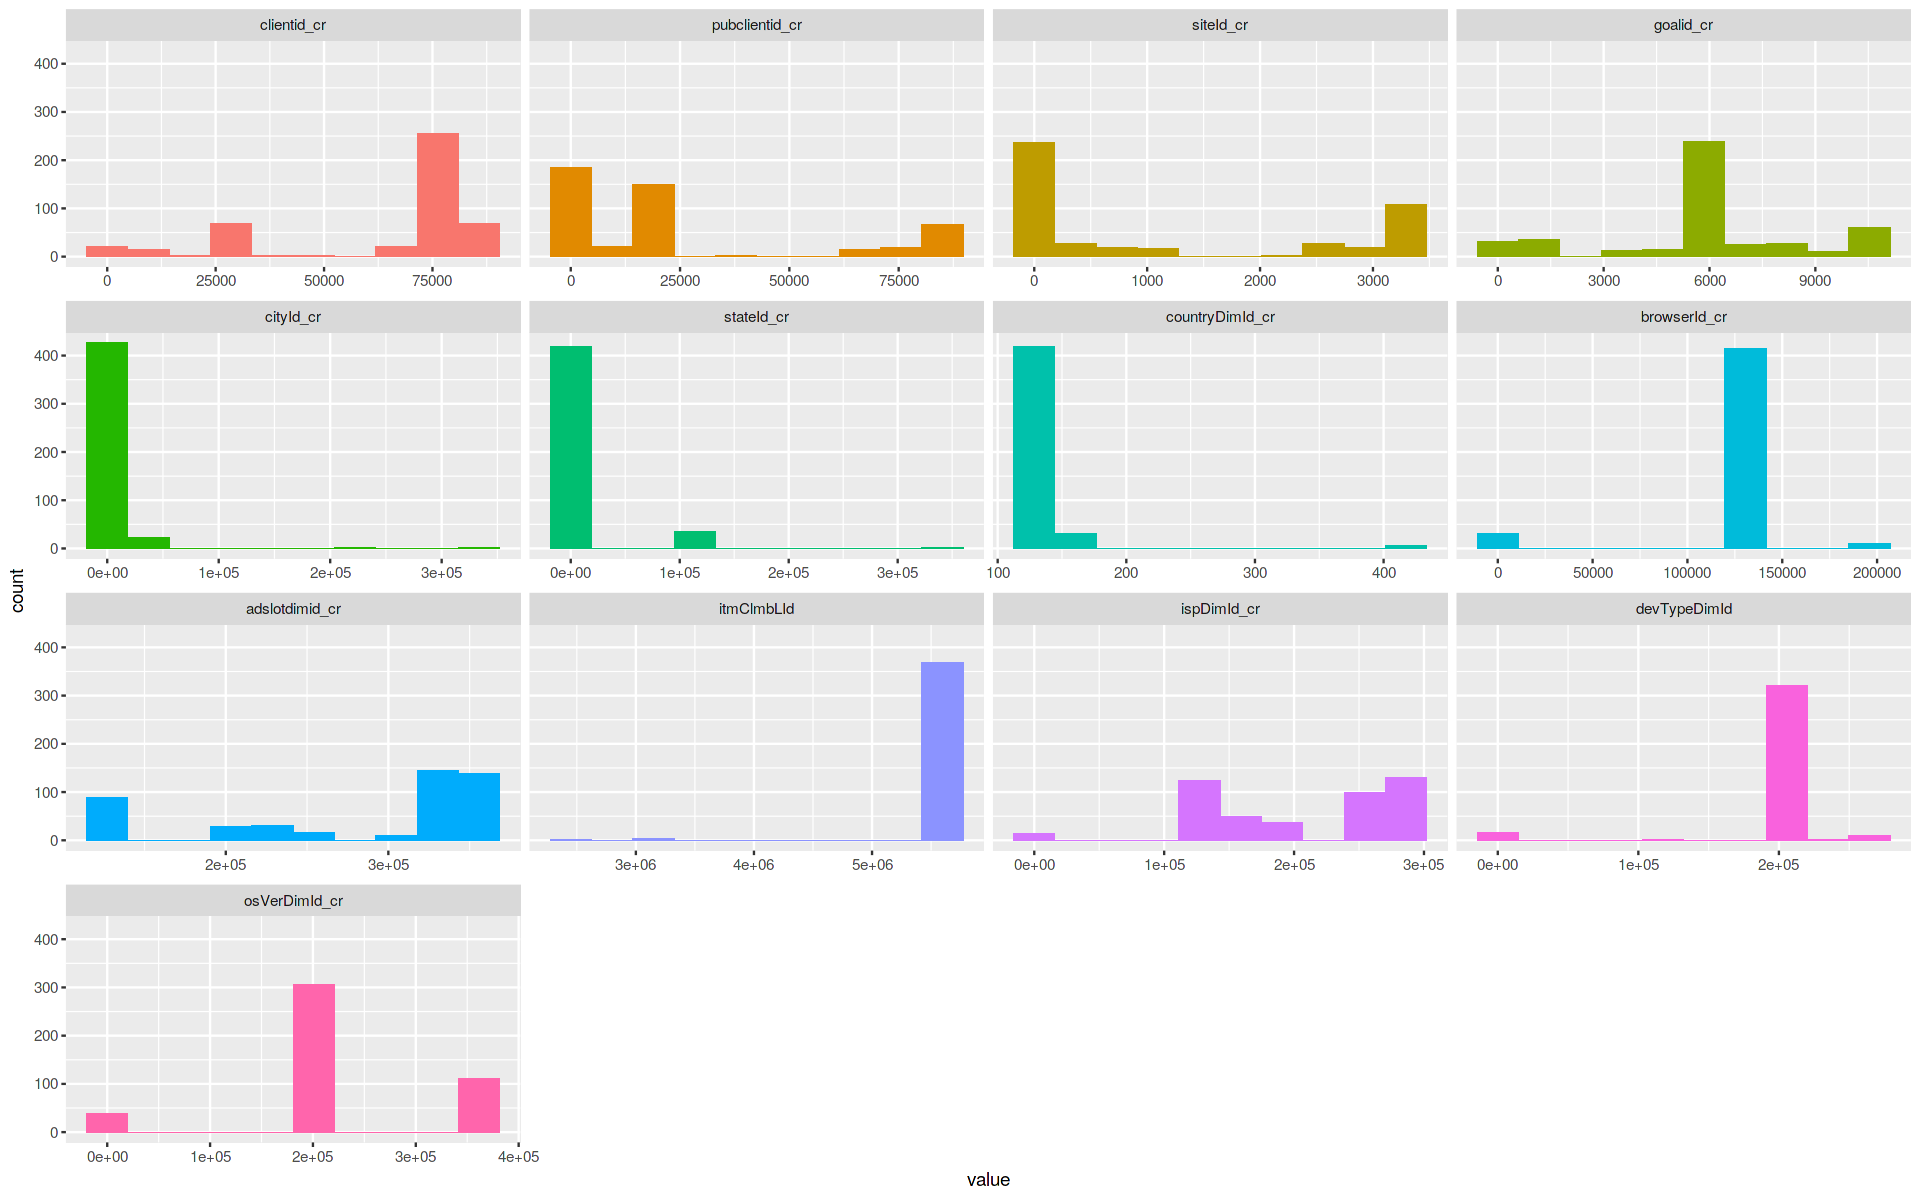

In [14]:
plot_num(test1)

##  **4. Data Manipulation**

#### 4.1 Manipulating Click-ip feature from Train & Test Data

In [15]:
# Splitting clickIp from train

df1 = data.frame(do.call(rbind,strsplit(train$clickIp, split = ".", fixed = TRUE)))
df1 = data.frame(do.call(rbind,strsplit(as.character(df1$X1), split = ":", fixed = TRUE)))
df1 = df1[1]
names(df1)[names(df1)=="X1"] = "ip"

# Merging ip with train data
train1 = select(train,-clickIp)
train1 = cbind(df1,train1)

# Splitting clickIp from test

df2 = data.frame(do.call(rbind,strsplit(test$clickIp, split = ".", fixed = TRUE)))
df2 = data.frame(do.call(rbind,strsplit(as.character(df2$X1), split = ":", fixed = TRUE)))
df2 = df2[1]
names(df2)[names(df2)=="X1"] = "ip"

# Merging ip with test data
test1 = select(test,-clickIp)
test1 = cbind(df2,test1)

In [16]:
summary(train1$ip)

0  101  103  108  112  115  117  121  122  125  142  144  145  160  165  171 
 587    1    6    1    1    1    8    1    1    1    1   47   15    1    1    1 
 174  182  183  184  199 2001  223 2401 2405 2409 2607   27    3   34   35   42 
   1    1    1    1    1    1    3    7    6    7    1    1    1    1    3    1 
 423  425  433   47   49   52   54   59   60   70   72   96 NA's 
   1    1    3    1    5    1    1    2    1    2    1    1  234

![](https://bytesofgigabytes.com/IMAGES/Networking/ipaddress/IP%20address%20range.PNG)

> **Range starting with 2000 or 3000 belongs to IPV6**

> **Few Records with range >400 are Invalid Ip**

In [17]:
# Assigning Classes To IP

train1$ip = as.character(train1$ip)
train1$ip[as.numeric(train1$ip)>=0 & as.numeric(train1$ip) <= 127] = "ipv4.A"
train1$ip[as.numeric(train1$ip)>=128 & as.numeric(train1$ip) <= 191] = "ipv4.B"
train1$ip[as.numeric(train1$ip)>=192 & as.numeric(train1$ip) <= 223] = "ipv4.C"
train1$ip[as.numeric(train1$ip)>=2000 & as.numeric(train1$ip) <= 3000] = "ipv6"
train1$ip[as.numeric(train1$ip)>=400 & as.numeric(train1$ip) <= 500] = "X"

test1$ip = as.character(test1$ip)
test1$ip[as.numeric(test1$ip)>=0 & as.numeric(test1$ip) <= 127] = "ipv4.A"
test1$ip[as.numeric(test1$ip)>=128 & as.numeric(test1$ip) <= 191] = "ipv4.B"
test1$ip[as.numeric(test1$ip)>=192 & as.numeric(test1$ip) <= 223] = "ipv4.C"
test1$ip[as.numeric(test1$ip)>=2000 & as.numeric(test1$ip) <= 3000] = "ipv6"
test1$ip[as.numeric(test1$ip)>=400 & as.numeric(test1$ip) <= 500] = "X"

In [18]:
paste("Class summary of IP in train data")
summary(as.factor(train1$ip))
paste("Class summary of IP in test data")
summary(as.factor(test1$ip))

[1] "Class summary of IP in train data"

ipv4.A ipv4.B ipv4.C   ipv6      X   NA's 
   630     70      4     22      5    234

[1] "Class summary of IP in test data"

ipv4.A ipv4.B ipv4.C   ipv6      X   NA's 
   276     37      4     13      3    122

#### 4.2 Manipulating clmbuserid_cr & imprid_cr features from Train & Test Data

In [19]:
# Train Data
df3 = data.frame(do.call(rbind,strsplit(train1$clmbuserid_cr, split = "-", fixed = TRUE)))
df4 = data.frame(do.call(rbind,strsplit(train1$imprid_cr, split = "-", fixed = TRUE)))

# Renaming columns 
names(df4)[1] = paste("Y1")
names(df4)[2] = paste("Y2")
names(df4)[3] = paste("Y3")
names(df4)[4] = paste("Y4")
names(df4)[5] = paste("Y5")
names(df4)[6] = paste("Y6")

train2 = select(train1,-imprid_cr,-clmbuserid_cr)
train2 = cbind(df3,df4,train2)

# Test Data
df5 = data.frame(do.call(rbind,strsplit(test1$clmbuserid_cr, split = "-", fixed = TRUE)))
df6 = data.frame(do.call(rbind,strsplit(test1$imprid_cr, split = "-", fixed = TRUE)))

# Renaming columns
names(df6)[1] = paste("Y1")
names(df6)[2] = paste("Y2")
names(df6)[3] = paste("Y3")
names(df6)[4] = paste("Y4")
names(df6)[5] = paste("Y5")
names(df6)[6] = paste("Y6")

test2 = select(test1,-imprid_cr,-clmbuserid_cr)
test2 = cbind(df5,df6,test2)

#### 4.3 Encoding X1-Y6 to Numeric Format

In [20]:
train2[sapply(train2, is.factor)] = lapply(train2[sapply(train2,is.factor)],as.numeric)
test2[sapply(test2, is.factor)] = lapply(test2[sapply(test2,is.factor)],as.numeric)

#### 4.4 Encoding Target Variable from Logical to Categorical Format

In [21]:
train2$conversion_fraud = as.factor(train2$conversion_fraud)
paste("Conversion Fraud in Train Data")
summary(train2$conversion_fraud)

[1] "Conversion Fraud in Train Data"

FALSE  TRUE 
  834   131

In [22]:
paste("Train Data")
glimpse(train2)

[1] "Train Data"

Rows: 965
Columns: 27
$ X1               <dbl> 193, 289, 745, 873, 10, 289, 71, 385, 332, 143, 10, 7…
$ X2               <dbl> 44, 689, 317, 340, 693, 689, 704, 675, 443, 262, 693,…
$ X3               <dbl> 297, 452, 459, 150, 572, 452, 769, 211, 354, 728, 572…
$ X4               <dbl> 559, 59, 811, 268, 263, 59, 421, 435, 36, 149, 263, 4…
$ X5               <dbl> 478, 293, 44, 47, 379, 293, 570, 539, 61, 418, 379, 6…
$ X6               <dbl> 71, 47, 74, 51, 80, 47, 42, 71, 128, 22, 80, 61, 98, …
$ Y1               <dbl> 9, 934, 27, 49, 61, 934, 74, 933, 932, 931, 84, 930, …
$ Y2               <dbl> 732, 687, 225, 548, 542, 687, 287, 532, 569, 537, 480…
$ Y3               <dbl> 708, 807, 30, 613, 714, 807, 219, 521, 438, 352, 5, 1…
$ Y4               <dbl> 661, 323, 117, 714, 590, 323, 318, 657, 1, 437, 631, …
$ Y5               <dbl> 113, 170, 622, 181, 217, 170, 396, 756, 367, 44, 541,…
$ Y6               <dbl> 25, 26, 7, 8, 29, 26, 34, 48, 9, 12, 22, 20, 48, 32, …
$ ip              

##  **5. Data Imputation**

> ***Imputing Numeric Variables by Mean & Categorical with Mode***

In [23]:
train = train2
test = test2

print("Summary for IP for Train Data")
summary(as.factor(train$ip))
print("Summary for IP for Test Data")
summary(as.factor(test$ip))

[1] "Summary for IP for Train Data"


ipv4.A ipv4.B ipv4.C   ipv6      X   NA's 
   630     70      4     22      5    234

[1] "Summary for IP for Test Data"


ipv4.A ipv4.B ipv4.C   ipv6      X   NA's 
   276     37      4     13      3    122

> ***Replacing IP NA's by Mode i.e. ipv4.A***

In [24]:
# Imputing Train data

train$ip[is.na(train1$ip)] = "ipv4.A"
train$cityId_cr[is.na(train$cityId_cr)] = mean(train$cityId_cr,na.rm = TRUE)
train$stateId_cr[is.na(train$stateId_cr)] = mean(train$stateId_cr,na.rm = TRUE)
train$countryDimId_cr[is.na(train$countryDimId_cr)] = mean(train$countryDimId_cr,na.rm = TRUE)
train$browserId_cr[is.na(train$browserId_cr)] = mean(train$browserId_cr,na.rm = TRUE)
train$itmClmbLId[is.na(train$itmClmbLId)] = mean(train$itmClmbLId,na.rm = TRUE)
train$ispDimId_cr[is.na(train$ispDimId_cr)] = mean(train$ispDimId_cr,na.rm = TRUE)
train$devTypeDimId[is.na(train$devTypeDimId)] = mean(train$devTypeDimId,na.rm = TRUE)
train$osVerDimId_cr[is.na(train$osVerDimId_cr)] = mean(train$osVerDimId_cr,na.rm = TRUE)

# Imputing Test data

test$ip[is.na(test1$ip)] = "ipv4.A"
test$itmClmbLId[is.na(test$itmClmbLId)] = mean(test$itmClmbLId,na.rm = TRUE)
test$devTypeDimId[is.na(test$devTypeDimId)] = mean(test$devTypeDimId,na.rm = TRUE)

##  **6. Label Encoding**

> ***Label Encoding IP & Conversion Fraud Features***

In [25]:
library(superml)

label = LabelEncoder$new()

train$ip = label$fit_transform(train$ip)
train$conversion_fraud = label$fit_transform(train$conversion_fraud)

test$ip = label$fit_transform(test$ip)

Loading required package: R6



#### Train Data

In [26]:
View(head(train,5))

,X1,X2,X3,X4,X5,X6,Y1,Y2,Y3,Y4,⋯,cityId_cr,stateId_cr,countryDimId_cr,browserId_cr,adslotdimid_cr,itmClmbLId,ispDimId_cr,devTypeDimId,osVerDimId_cr,conversion_fraud
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,193,44,297,559,478,71,9,732,708,661,⋯,436,1806,144,129639,321300,5488088,280429,202038.0,199452,1
2,289,689,452,59,293,47,934,687,807,323,⋯,10314,1817,144,129639,129239,5488773,136127,202038.0,199452,1
3,745,317,459,811,44,74,27,225,30,117,⋯,0,1812,144,129639,321554,5488088,172725,202038.0,199452,1
4,873,340,150,268,47,51,49,548,613,714,⋯,10300,1815,144,129639,321300,5488088,136127,202038.0,199452,1
5,10,693,572,263,379,80,61,542,714,590,⋯,0,1818,144,129408,355768,5614054,136127,192642.6,360833,1


#### Test Data

In [27]:
View(head(test,5))

,X1,X2,X3,X4,X5,X6,Y1,Y2,Y3,Y4,⋯,goalid_cr,cityId_cr,stateId_cr,countryDimId_cr,browserId_cr,adslotdimid_cr,itmClmbLId,ispDimId_cr,devTypeDimId,osVerDimId_cr
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,29,168,239,411,143,90,41,343,328,339,⋯,8628,0,2442,145,0,233531,5580430,265618,0,0
2,136,250,257,107,391,42,37,259,393,31,⋯,6384,10278,1808,144,129639,356952,5488773,280429,202038,199414
3,136,250,257,107,391,42,142,124,234,62,⋯,6384,10278,1808,144,129639,356952,5488088,280429,202038,199414
4,159,313,276,133,37,44,18,355,159,73,⋯,3370,10239,1801,144,129408,355768,5614054,280429,192723,360833
5,159,313,276,133,37,44,23,87,144,194,⋯,3370,10239,1801,144,129408,355768,5614054,280429,192723,360833


##  **7. Data Modeling: AUTO - ML**

In [28]:
train = round(train,digits = 0)
test = round(test,digits = 0)

train[sapply(train, is.numeric)] = lapply(train[sapply(train,is.numeric)],as.factor)
test[sapply(test, is.numeric)] = lapply(test[sapply(test,is.numeric)],as.factor)

In [29]:
library(h2o)
h2o.init()

train.h2o = as.h2o(train)
test.h2o = as.h2o(test)
y = 27   # Target column index             
x = c(1:26)


----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit http://docs.h2o.ai

----------------------------------------------------------------------



Attaching package: ‘h2o’


The following objects are masked from ‘package:stats’:

    cor, sd, var


The following objects are masked from ‘package:base’:

    &&, %*%, %in%, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc





H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/RtmpTTUieD/filed27b40f78/h2o_UnknownUser_started_from_r.out
    /tmp/RtmpTTUieD/filed4851d764/h2o_UnknownUser_started_from_r.err


Starting H2O JVM and connecting: .. Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         2 seconds 471 milliseconds 
    H2O cluster timezone:       Etc/UTC 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.30.0.1 
    H2O cluster version age:    1 year, 2 months and 3 days !!! 
    H2O cluster name:           H2O_started_from_R_root_hzv856 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   4.00 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API

In [30]:
# Selecting 25 models for Auto-ML

aml = h2o.automl(x=x,y=y,training_frame=train.h2o,
                 max_models = 25,
                 nfolds = 5,
                 keep_cross_validation_predictions = TRUE,
                 balance_classes = TRUE,
                 stopping_tolerance = 1/sqrt(nrow.H2OFrame(train.h2o)),
                 include_algos = c("GLM", "DeepLearning", "DRF"),
                 max_runtime_secs = 1000,
                 seed=100)

  |======================================================================| 100%


In [31]:
# View the AutoML Leaderboard

lb = aml@leaderboard
print(lb, n = nrow(lb))

                                              model_id       auc   logloss
1                         GLM_1_AutoML_20210607_130403 0.9320666 0.1479933
2                DeepLearning_1_AutoML_20210607_130403 0.9251835 0.2887212
3  DeepLearning_grid__1_AutoML_20210607_130403_model_1 0.9218793 0.2089538
4  DeepLearning_grid__2_AutoML_20210607_130403_model_1 0.9171655 0.5295186
5  DeepLearning_grid__1_AutoML_20210607_130403_model_2 0.9111062 0.1868809
6  DeepLearning_grid__2_AutoML_20210607_130403_model_2 0.9072528 0.7019817
7  DeepLearning_grid__1_AutoML_20210607_130403_model_3 0.8897660 0.3862449
8  DeepLearning_grid__1_AutoML_20210607_130403_model_4 0.8593598 3.0859184
9                         DRF_1_AutoML_20210607_130403 0.8366421 1.3732883
10 DeepLearning_grid__3_AutoML_20210607_130403_model_1 0.8246426 6.1328447
11                        XRT_1_AutoML_20210607_130403 0.7780997 1.3560367
12 DeepLearning_grid__2_AutoML_20210607_130403_model_3 0.7117497 5.2173502
13 DeepLearning_grid__3_A

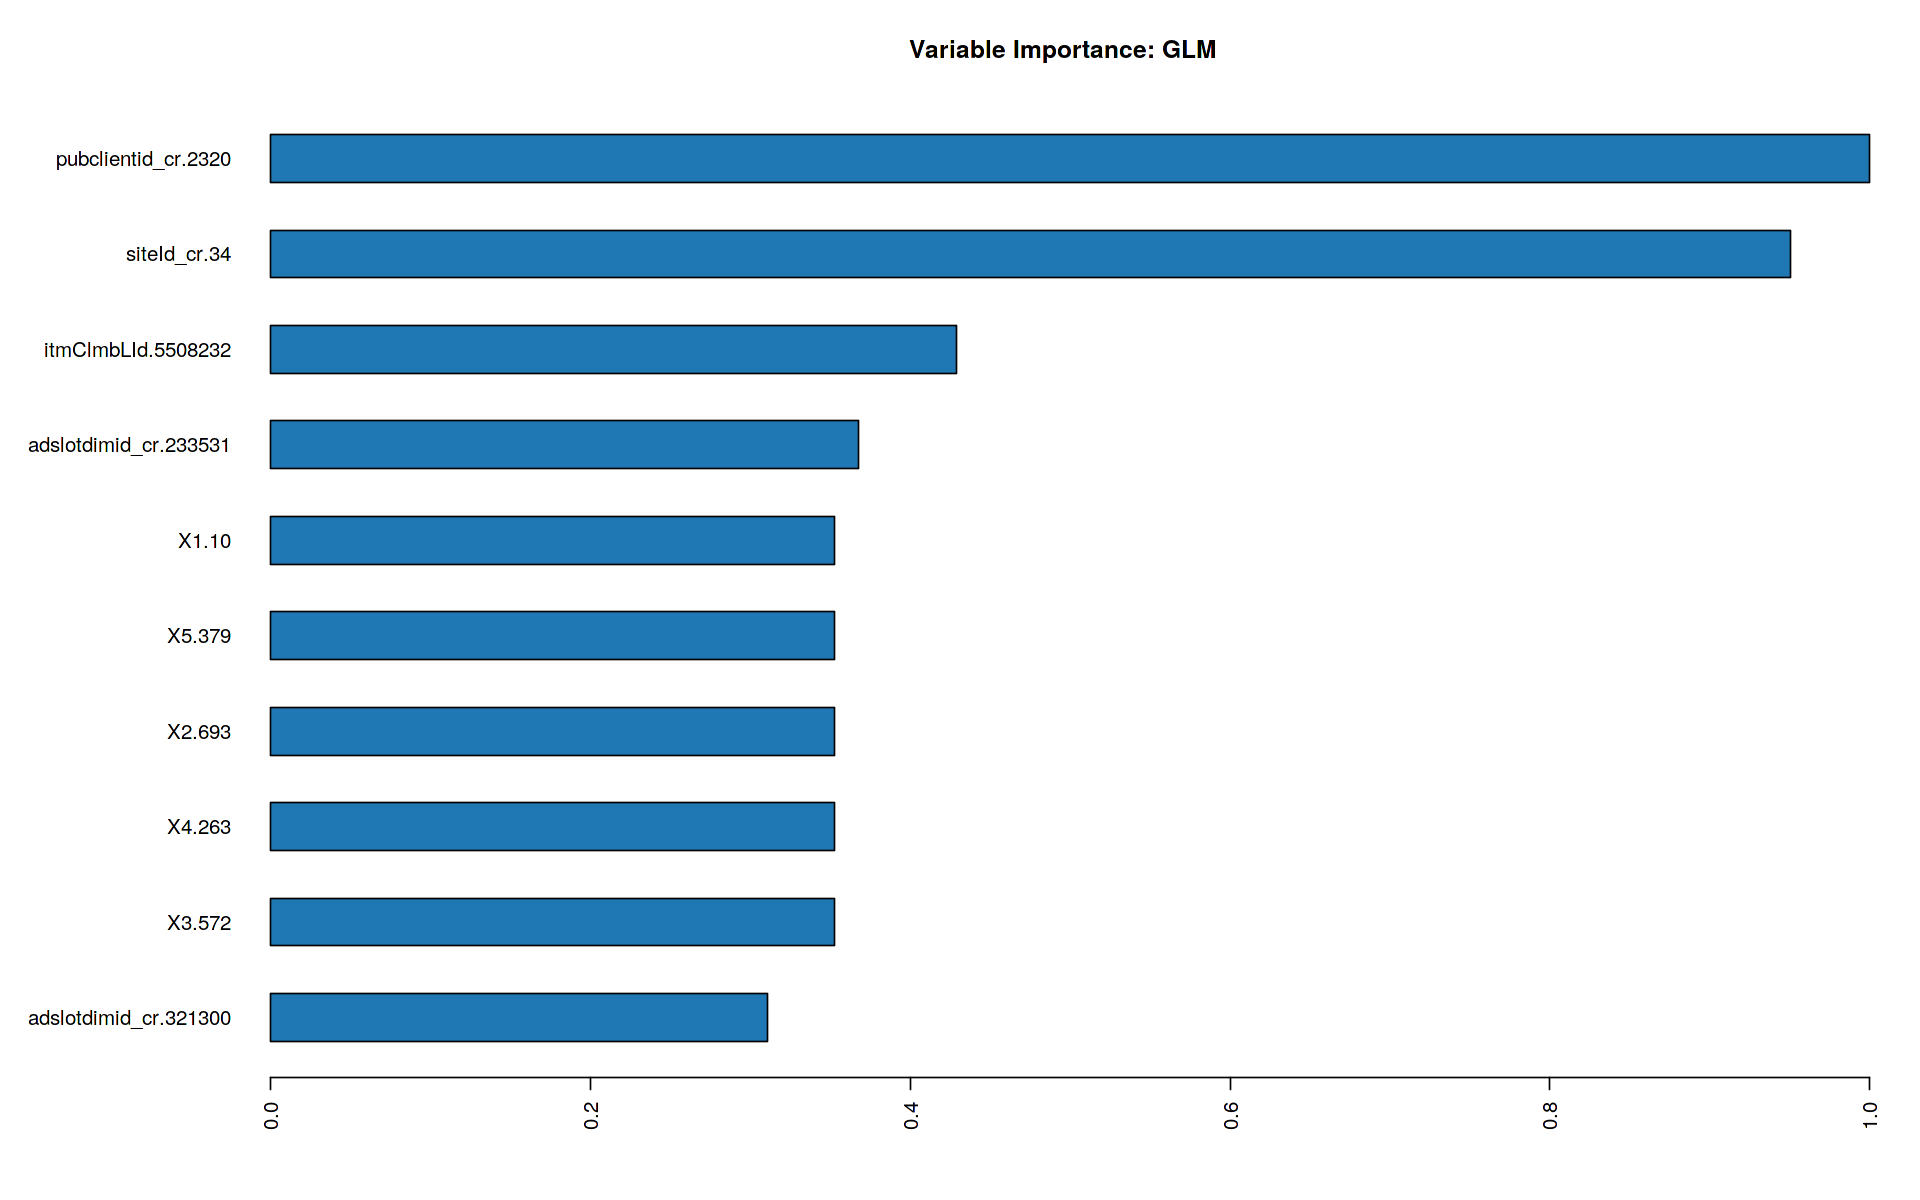

In [32]:
h2o.varimp_plot(aml@leader)

> **Predicting Using The LeaderBoard's Top Model**

In [33]:
pred = h2o.predict(aml@leader, test.h2o)

t = read_csv("../input/cg2021/Test Data.csv")
record_id = select(t,record_id)

Ans = cbind(record_id,as.data.frame(pred))
Ans = select(Ans,record_id,predict)
names(Ans)[2] = paste("conversion_fraud")

# Converting Target back to logical format
Ans$conversion_fraud = as.numeric(Ans$conversion_fraud) - 1
Ans$conversion_fraud = as.logical(Ans$conversion_fraud)

  |======================================================================| 100%



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  clmbuserid_cr = col_character(),
  imprid_cr = col_character(),
  audiences_cr = col_character(),
  ip_cr = col_character(),
  refurl_cr = col_character(),
  allAudiences_cr = col_character(),
  uvh_cr = col_logical(),
  sdkVersion_cr = col_character(),
  conversionid_cr = col_character(),
  optimize_on_cr = col_logical()
)
ℹ Use `spec()` for the full column specifications.




##  **8. Output**

In [34]:
View(head(Ans,8))

,record_id,conversion_fraud
,<dbl>,<lgl>
1,1000,TRUE
2,1001,FALSE
3,1002,FALSE
4,1003,FALSE
5,1004,FALSE
6,1005,FALSE
7,1006,FALSE
8,1007,FALSE
